In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.cifar100.load_data()

In [3]:
x_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

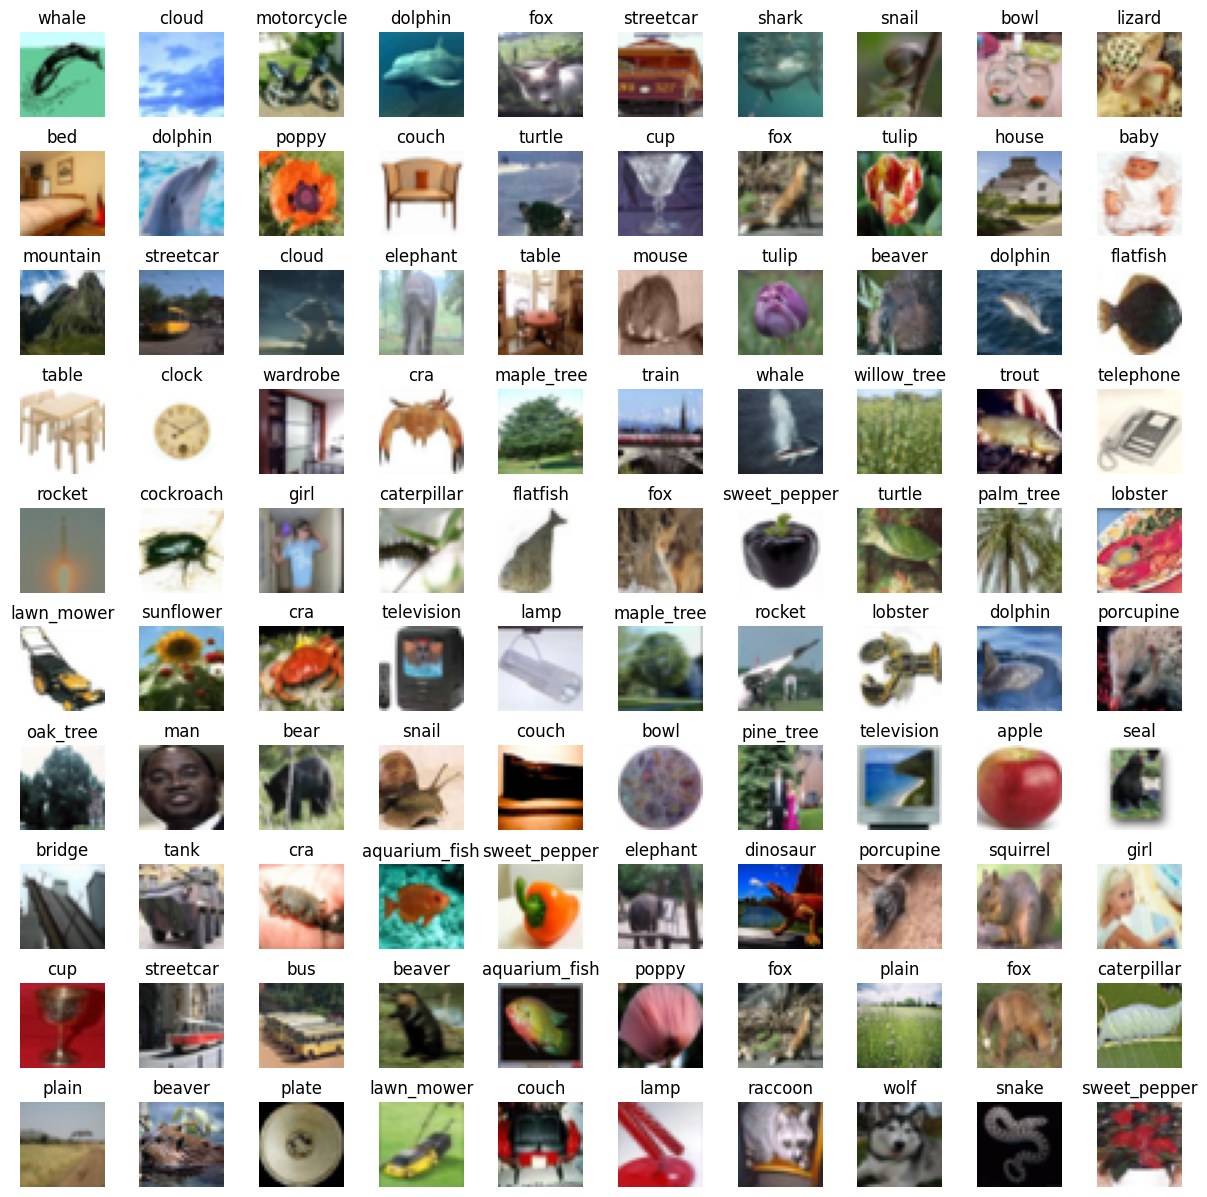

In [4]:
classes = ['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge',\
           'bus','butterfly','camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud',\
           'cockroach','couch','cra','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl',\
           'hamster','house','kangaroo','keyboard','lamp','lawn_mower','leopard','lion','lizard','lobster','man',\
           'maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree',\
           'pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road',\
           'rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel',\
           'streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train',\
           'trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm',
]       
           
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(15,15))

for _ , axis in enumerate(axes.flat):
    rand = np.random.randint(50000)
    axis.imshow(x_train[rand] , cmap = 'gray')
    axis.set_title(classes[y_train[rand,0]])
    axis.axis('off')
    
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [5]:
model = keras.Sequential([
    keras.layers.Rescaling(1/255.0 , input_shape = (32,32,3)),
    
    keras.layers.Conv2D(64 , (3,3) , padding = 'same' , activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),
    
    keras.layers.Conv2D(128 , (3,3) , padding = 'same' , activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),

    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1024 , activation = 'relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100, activation="softmax")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       7

In [7]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [8]:
model.fit(x_train , y_train , batch_size = 128 , validation_split = 0.1 , epochs=20)

Epoch 1/20
352/352 [==============================] - 79s 222ms/step - loss: 3.9272 - accuracy: 0.1653 - val_loss: 29.9539 - val_accuracy: 0.0248
Epoch 2/20
352/352 [==============================] - 78s 221ms/step - loss: 2.8023 - accuracy: 0.3017 - val_loss: 3.1593 - val_accuracy: 0.2386
Epoch 3/20
352/352 [==============================] - 77s 219ms/step - loss: 2.3830 - accuracy: 0.3866 - val_loss: 2.8259 - val_accuracy: 0.3234
Epoch 4/20
352/352 [==============================] - 77s 220ms/step - loss: 2.0307 - accuracy: 0.4638 - val_loss: 2.7298 - val_accuracy: 0.3410
Epoch 5/20
352/352 [==============================] - 78s 222ms/step - loss: 1.6876 - accuracy: 0.5415 - val_loss: 2.7002 - val_accuracy: 0.3522
Epoch 6/20
352/352 [==============================] - 84s 237ms/step - loss: 1.3527 - accuracy: 0.6206 - val_loss: 2.7468 - val_accuracy: 0.3768
Epoch 7/20
352/352 [==============================] - 81s 231ms/step - loss: 1.0279 - accuracy: 0.7029 - val_loss: 2.8006 - val_a

In [10]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 7s 22ms/step - loss: 4.6808 - accuracy: 0.3887


[4.6807990074157715, 0.388700008392334]

In [11]:
model.save('cifar100.h5')